In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import *

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Importing dataset and examining it
dataset = pd.read_csv("/content/drive/MyDrive/VehicleCollisions.csv")
pd.set_option('display.max_columns', None) # to make sure you can see all the columns in output window
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Number_of_Vehicles           Road_Type  Speed_limit Light_Conditions  \
0                   2    Dual carriageway           40         Daylight   
1                   2    Dual carriageway           40         Daylight   
2                   2  Single carriageway           30         Daylight   
3                   2  Single carriageway           30         Daylight   
4                   2  Single carriageway           30         Daylight   

   Weather_Conditions Road_Surface_Conditions Urban_or_Rural_Area  \
0  Fine no high winds                     Dry               Urban   
1  Fine no high winds                     Dry               Urban   
2  Fine no high winds                     Dry               Urban   
3  Fine no high winds                     Dry               Urban   
4  Fine no high winds                     Dry               Urban   

  Vehicle_Manoeuvre 1st_Point_of_Impact Sex_of_Driver  Age_of_Driver  \
0       Going ahead               Front          Male         

In [3]:
# Converting Categorical features into Numerical features
le=LabelEncoder()
def labeling(columName):
  dataset[columName]=le.fit_transform(dataset[columName])

In [4]:
labeling('Road_Type')
labeling('Speed_limit')
labeling('Light_Conditions')
labeling('Weather_Conditions')
labeling('Road_Surface_Conditions')
labeling('Urban_or_Rural_Area')
labeling('Vehicle_Manoeuvre')
labeling('1st_Point_of_Impact')
labeling('Sex_of_Driver')
labeling('Damage')


In [5]:
dataset.head

<bound method NDFrame.head of        Number_of_Vehicles  Road_Type  Speed_limit  Light_Conditions  \
0                       2          0            2                 3   
1                       2          0            2                 3   
2                       2          3            1                 3   
3                       2          3            1                 3   
4                       2          3            1                 3   
...                   ...        ...          ...               ...   
37864                   4          0            5                 3   
37865                   4          0            5                 3   
37866                   4          0            5                 3   
37867                   2          0            5                 0   
37868                   2          0            5                 0   

       Weather_Conditions  Road_Surface_Conditions  Urban_or_Rural_Area  \
0                       1                 

In [6]:
# Dividing dataset into label and feature sets
X = dataset.drop('Damage', axis = 1) # Features
Y = dataset['Damage'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(37869, 12)
(37869,)


In [7]:
#Using corelation to find the fearures that highly affect the results
cor = dataset.corr()
cor_target = cor['Damage']

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]

#printin
print(relevant_features)

Number_of_Vehicles     0.017335
Road_Type              0.019968
Vehicle_Manoeuvre      0.013146
1st_Point_of_Impact    0.060394
Sex_of_Driver          0.034846
Age_of_Driver          0.022677
Damage                 1.000000
Name: Damage, dtype: float64


In [8]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [9]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

In [10]:
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class before oversampling (training data): 
 0    24715
1     1793
Name: Damage, dtype: int64


In [11]:
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [12]:

print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class after oversampling (training data): 
 1    24715
0    24715
dtype: int64


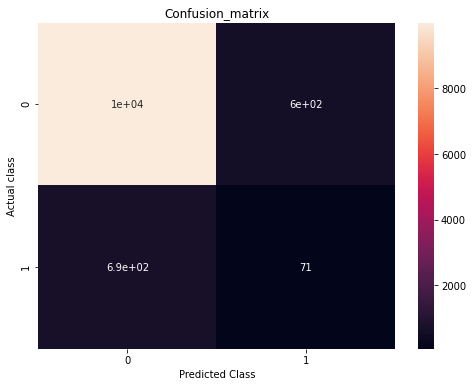

Confusion matrix: 
 [[9996  601]
 [ 693   71]]
TP:  71
TN:  9996
FP:  601
FN:  693


In [13]:
# Building random forest model
rfc = RandomForestClassifier(n_estimators=300, criterion='entropy', max_features='auto')
rfc.fit(X_train,Y_train)
Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [14]:
# Tuning the random forest parameter 'n_estimators' and implementing cross-validation using Grid Search
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [50, 100, 150, 200, 250, 300]}

In [15]:
gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)


"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

In [16]:
gd_sr.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, ra

In [17]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 250}


In [18]:
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

0.9196439409265628


In [19]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

Engine_Capacity_(CC)       0.282197
Age_of_Driver              0.238736
Vehicle_Manoeuvre          0.117858
1st_Point_of_Impact        0.112285
Speed_limit                0.051493
Road_Type                  0.048390
Number_of_Vehicles         0.037011
Weather_Conditions         0.027424
Road_Surface_Conditions    0.025055
Light_Conditions           0.023787
Sex_of_Driver              0.023703
Urban_or_Rural_Area        0.012064
dtype: float64


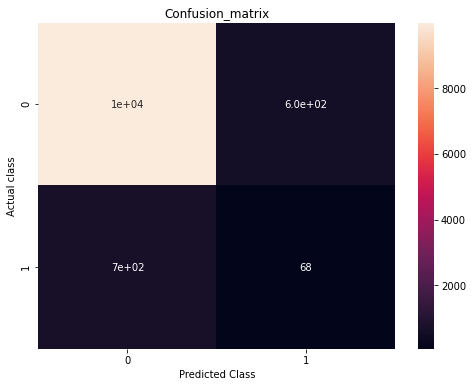

Confusion matrix: 
 [[9992  605]
 [ 696   68]]
TP:  68
TN:  9992
FP:  605
FN:  696


In [20]:
Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [21]:
print('Accuracy score before feature selection: ',metrics.accuracy_score(Y_test,Y_pred)*100)

Accuracy score before feature selection:  88.54854326203679


In [57]:
# Selecting features with higher sifnificance and redefining feature set
X = dataset[[ 'Speed_limit','Sex_of_Driver','Urban_or_Rural_Area', 'Road_Type','Number_of_Vehicles','Road_Surface_Conditions','Age_of_Driver','1st_Point_of_Impact','Light_Conditions','Weather_Conditions','Vehicle_Manoeuvre']]

In [58]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [59]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

In [60]:
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [61]:
rfc = RandomForestClassifier(n_estimators=400, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

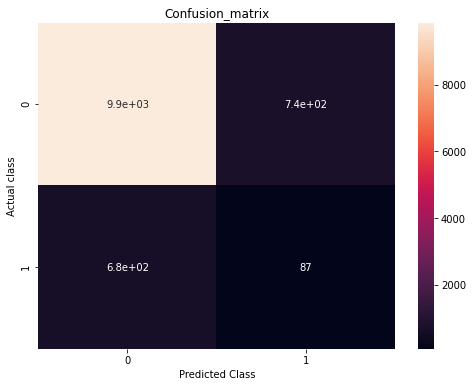

Confusion matrix: 
 [[9855  742]
 [ 677   87]]
TP:  87
TN:  9855
FP:  742
FN:  677


In [62]:
Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

In [63]:
print('Accuracy score: ',metrics.accuracy_score(Y_test,Y_pred)*100)

Accuracy score:  87.50990229733299
